An inverted pendulum is a pendulum that sits on a cart, which can be moved with a force. It follows the following equations of motion

$$(M+m)\ddot{x} - m\ell\ddot{\theta} \cos \theta + m\ell\dot{\theta}^2 \sin \theta = F,$$
$$\ell \ddot{\theta} - g \sin \theta = \ddot{x} \cos \theta$$

Here $x$ is the position of the cart, $\theta$ is the angle of the pendulum, $\ell$ is the length of the pendulum, and $M$, $m$ are the mass of the cart and the pendulum, respectively.

Finally, is the force applied to the cart, this force can be time-dependent.

1. Write an accurate simulation of the above system to solve for $x(t)$ and $\theta(t)$ and make a nice visualization of the simulation.
2. By applying a time-varying force that depends on the state parameters, e.g. $F(x(t),\dot{x}(t),\theta(t),\dot{\theta}(t))$, can you balance the pendulum upright (assuming it starts upright). It could make sense to consider requirements on $x$ as well to ensure the pendulum stays within a reasonable position.
3. Play with the parameters, is it easier to balance a long pendulum? A heavy one? How do you measure this?
4. If the pendulum starts hanging, can you get it upright by the applying the correct force? Can you do in a way so it works for all lengths and masses?

Finally, if you have time, expand your simulation to a double pendulum and go through the above questions again.

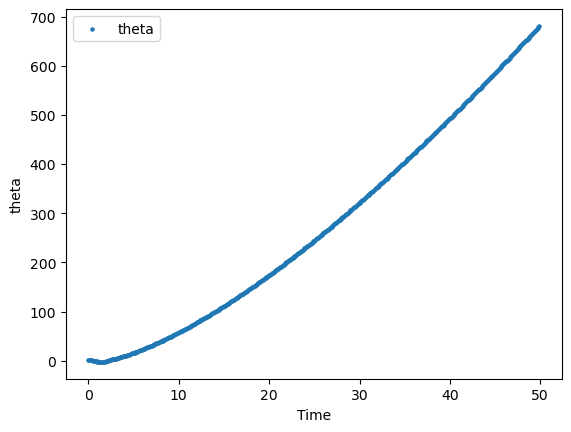

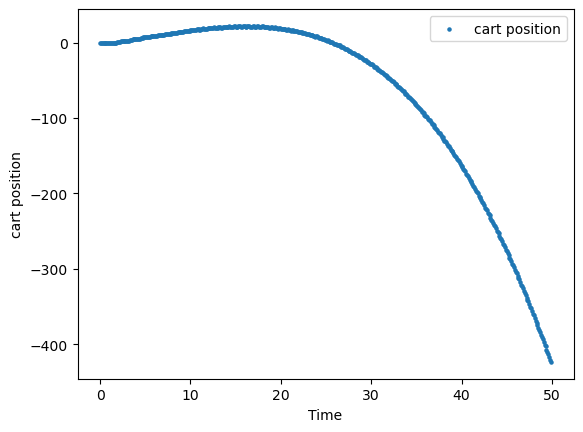

In [31]:
import numpy as np

def equations(state, t, F, m, ell, M, g, dot_y, dot_z):
    # ddot_x = (F + m * ell * ddot_theta * np.cos(theta) - m * ell * (dot_theta)**2 * np.sin(theta)) / (M + m)
    # ddot_theta = (g * np.sin(ddot_theta) + ddot_x * np.cos(theta)) / ell
    x, theta, y, z = state

    dxdt = y
    dydt = (F + m * ell * dot_z * np.cos(theta) - m * ell * z**2 * np.sin(theta)) / (M + m)
    dthetadt = z
    dzdt = (dot_y * np.cos(theta) + g * np.sin(theta)) / ell

    return np.array([dxdt, dthetadt, dydt, dzdt])#dxdt, dydt, dthetadt, dzdt


def explicit_euler(f_0, t_max, dt, F, m, ell, M, g, dot_y, dot_z):
    t_values = np.arange(0, t_max, dt)
    f_values = [f_0]

    for i in range(1, len(t_values)):
        t_i = t_values[i-1]
        f_i = f_values[i - 1]
        f_new = f_i + dt * equations(f_i, t_i, F, m, ell, M, g, dot_y, dot_z)
        f_values.append(f_new)

    return t_values, f_values

#def runge_kutta_fourth_order(f_0, dt, t_max, F, m, ell, theta, M, g, dot_y, dot_z):
#    t_values = np.arange(0, t_max, dt)
#    f_values = [f_0]
#
#    for i in range(1, len(t_values)):
#        t_i = t_values[i-1]
#        f_i = f_values[i - 1]
#
#        k1 = equations(f_i, t_i, F, m, ell, theta, M, g, dot_y, dot_z)
#        k2 = equations(f_i + 0.5 * k1 * dt, t_i + 0.5 * dt, F, m, ell, theta, M, g, dot_y, dot_z)
#        k3 = equations(f_i + 0.5 * k2 * dt, t_i + 0.5 * dt,F, m, ell, theta, M, g, dot_y, dot_z)
#        k4 = equations(f_i + k3 * dt, t_i + dt, F, m, ell, theta, M, g, dot_y, dot_z)
#
#        f_new = f_i + (1 / 6) * (k1 + 2 * k2 + 2 * k3 + k4) * dt
#        f_values.append(f_new)
#
#    return t_values, f_values
theta = 0.9 * np.pi/2

initial_state = np.array([0,theta,0,0])
t_max = 50
dt = 0.1
F = 0
m = 5
ell = 1
M = 5
g = -9.81
dot_y = 0
dot_z = 0


t_values, f_values = explicit_euler(initial_state, t_max, dt, F, m, ell, M, g, dot_y, dot_z)
# t_values, f_values = runge_kutta_fourth_order(initial_state, dt, t_max, F, m, ell, theta, M, g, dot_y, dot_z)

import matplotlib.pyplot as plt

# theta = np.reshape(f_values, (np.shape(f_values)[0], np.shape(f_values)[1])) [1]
theta_values = []
for f in f_values:
    theta_values.append(f[1])
    

#plt.scatter(t_values, np.reshape(f_values, (np.shape(f_values)[1], np.shape(f_values)[0]))[1])
plt.scatter(t_values, theta_values, label = 'theta', s = 5)

plt.xlabel('Time')
plt.ylabel('theta')
plt.legend()

plt.show()


cart_pos = []
for f in f_values:
    cart_pos.append(f[0])

plt.scatter(t_values, cart_pos, s = 5, label = 'cart position')

plt.xlabel('Time')
plt.ylabel('cart position')
plt.legend()

plt.show()


$$\frac{dx}{dt} = y$$
$$\frac{dy}{dt} = \frac{F + m \cdot \ell \cdot \dot{z} \cdot \cos (\theta) - m \cdot \ell \cdot z^2 \cdot \sin (\theta)}{M + m}$$

$$\frac{d\theta}{dt} = z$$
$$\frac{dz}{dt} = \frac{\dot{y}\cdot \cos(\theta) + g \cdot \sin(\theta)}{\ell}$$
